## Baseball statistics
I am opting to analyze the baseball dataset.
The questions I would like to answer from this is to find

1.Which team has the highest salaries?

2.Is there any corelation between team salaries and the team wins?

3.What is the association between team salary and baseball statistics like batting and pitching?

Do teams that have higher salaries have better batting and pitching averages?

Each  baseball CSV is a consolidated file since 1871. I just choose 2014 randomly as that is the first zip file I have downloaded.
## Load Data from CSVs

In [395]:
import pandas as pd
#Import the Salaries and the Teams files first
salaries_df = pd.read_csv('Salaries.csv')
team_df = pd.read_csv('Teams.csv')
salaries_2014_df = salaries_df[salaries_df.yearID == 2014].copy()

In [396]:
## Take the team info only for 2014 and pick the teamid and franchID only 
## Make another DF with franchID as the index

teams_2014_df = (team_df[team_df.yearID==2014])
teams_df = teams_2014_df[['teamID','franchID','name']].copy()
teamsidx_df = teams_df.set_index('franchID')
print teamsidx_df

         teamID                           name
franchID                                      
ARI         ARI           Arizona Diamondbacks
ATL         ATL                 Atlanta Braves
BAL         BAL              Baltimore Orioles
BOS         BOS                 Boston Red Sox
CHW         CHA                   Chicago Cubs
CHC         CHN              Chicago White Sox
CIN         CIN                Cincinnati Reds
CLE         CLE              Cleveland Indians
COL         COL               Colorado Rockies
DET         DET                 Detroit Tigers
HOU         HOU                 Houston Astros
KCR         KCA             Kansas City Royals
ANA         LAA  Los Angeles Angels of Anaheim
LAD         LAN            Los Angeles Dodgers
FLA         MIA                  Miami Marlins
MIL         MIL              Milwaukee Brewers
MIN         MIN                Minnesota Twins
NYY         NYA               New York Yankees
NYM         NYN                  New York Mets
OAK         O

In [397]:
## Data Wrangling to correct the team ID's in salaraies file
## Check to see if all the team ID's exist in the teams dataframe.
##Notice the NYM and SFG are franchise ID's instead of team ID's 
Incorrect_team_salaries_df= salaries_2014_df.loc[~ salaries_2014_df['teamID'].isin(teams_df['teamID'].values)]
print Incorrect_team_salaries_df

       yearID teamID lgID   playerID    salary
24432    2014    NYM   NL  blackvi01    502250
24433    2014    NYM   NL  brownan02    538045
24434    2014    NYM   NL  colonba01   9000000
24435    2014    NYM   NL  darnatr01    501560
24436    2014    NYM   NL   dudalu01   1637500
24437    2014    NYM   NL  familje01    502550
24438    2014    NYM   NL    geedi01   3625000
24439    2014    NYM   NL  germego01    504875
24440    2014    NYM   NL  grandcu01  13000000
24441    2014    NYM   NL  lagarju01    506636
24442    2014    NYM   NL  lannajo01   1500000
24443    2014    NYM   NL  matsuda01   1500000
24444    2014    NYM   NL  mejiaje01    509675
24445    2014    NYM   NL  murphda08   5700000
24446    2014    NYM   NL  niesejo01   5000000
24447    2014    NYM   NL  parnebo01   3700000
24448    2014    NYM   NL  reckean01    505340
24449    2014    NYM   NL   ricesc01    542500
24450    2014    NYM   NL  satinjo01    506809
24451    2014    NYM   NL  tejadru01   1100000
24452    2014

In [398]:
## So the salaraies dataframe needs to be cleaned to get accurate values.
## Function to return the correct team ID if it exists in the teams dataframe either as a team ID or FranchID
def correct_teamID(v_team_id):
    if v_team_id in teams_df['teamID'].values:
        return v_team_id
    elif v_team_id in teams_df['franchID'].values:
        return teamsidx_df.loc[v_team_id,'teamID']
    else:
        return ''



#Test the function
correct_teamID('NYM')

salaries_2014_df['teamID']= salaries_2014_df['teamID'].apply(correct_teamID)
#print salaries_2014_df[salaries_2014_df.teamID == 'SFG']

In [399]:
#Now groupby the salaries by team and sort them in descending order to find the team with the maximum salary.
new_salaries_df = ((salaries_2014_df.groupby(['yearID','teamID']).sum()['salary']).reset_index()).copy()
print new_salaries_df.sort_values(by = 'salary',ascending=0 )

## This answers the question that 'Los Angels Dodgers' have the highest team salary.


    yearID teamID     salary
13    2014    LAN  217014600
17    2014    NYA  197543907
20    2014    PHI  180944967
24    2014    SFN  163510167
9     2014    DET  152855500
3     2014    BOS  139019929
29    2014    WAS  131983680
12    2014    LAA  121988250
25    2014    SLN  120693000
27    2014    TEX  112255059
28    2014    TOR  109920100
6     2014    CIN  108217500
2     2014    BAL  103416000
15    2014    MIL  101217000
0     2014    ARI   97861500
1     2014    ATL   97609000
8     2014    COL   95403500
23    2014    SEA   92531100
18    2014    NYN   85556990
16    2014    MIN   83762500
7     2014    CLE   82151899
4     2014    CHA   81830500
21    2014    PIT   77178000
22    2014    SDN   75685700
11    2014    KCA   74594075
26    2014    TBA   72689100
19    2014    OAK   72408400
5     2014    CHN   65522500
14    2014    MIA   41836900
10    2014    HOU   35116300


Populating the interactive namespace from numpy and matplotlib


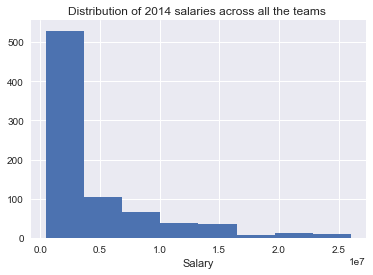

In [419]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.hist(salaries_2014_df['salary'].values, bins=8)
plt.xlabel('Salary')
plt.title('Distribution of 2014 salaries across all the teams ')

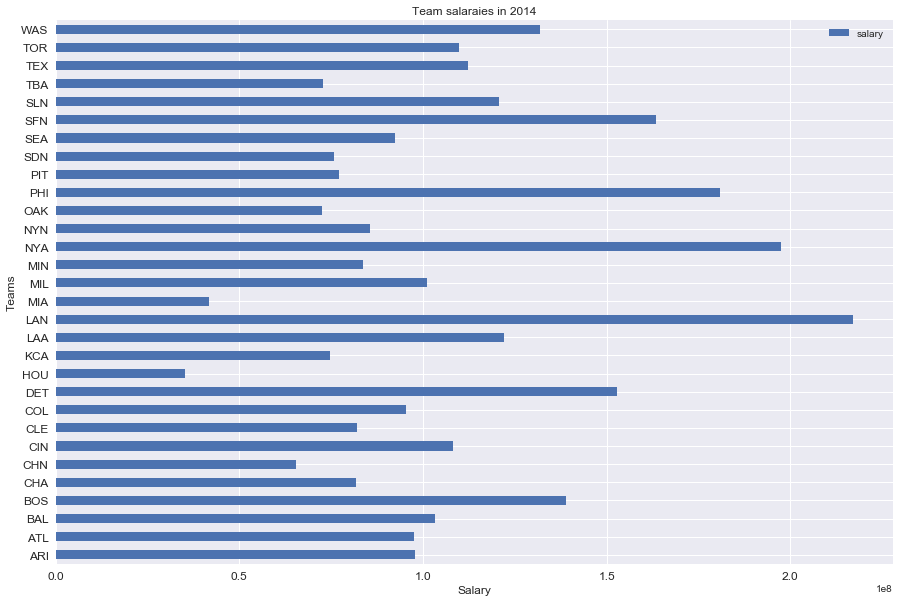

In [420]:
#A horizontal bargraph to plot the salaraies of the teams


plotidx_df = new_salaries_df[['teamID','salary']].set_index('teamID')
ax = plotidx_df.plot( kind='barh',title ="Team salaraies in 2014", figsize=(15, 10),legend=True,  fontsize=12)
ax.set_xlabel("Salary", fontsize=12)
ax.set_ylabel("Teams", fontsize=12)
plt.show()


In [401]:
#####################################
# 2.Is there any corelation between team salaries and the team wins?                 #
#For this the team csv has to be loaded to get the 2014 wins and loses by team 
# Then merge the two dataframes with the required only columns
#Next we calculate the corelation coefficient for the salaries and wins 
# Next do a scatter plot with the salaries and wins
#####################################

teamwins2014_df=  teams_2014_df[['yearID','teamID','name','W','L','G']].copy()
total_rows=len(new_salaries_df.axes[0])
print total_rows
salaries_vs_wins_df= new_salaries_df.merge(teamwins2014_df,left_on = ['yearID','teamID'],right_on = ['yearID','teamID'],how = 'left')
#print salaries_vs_wins_df

30


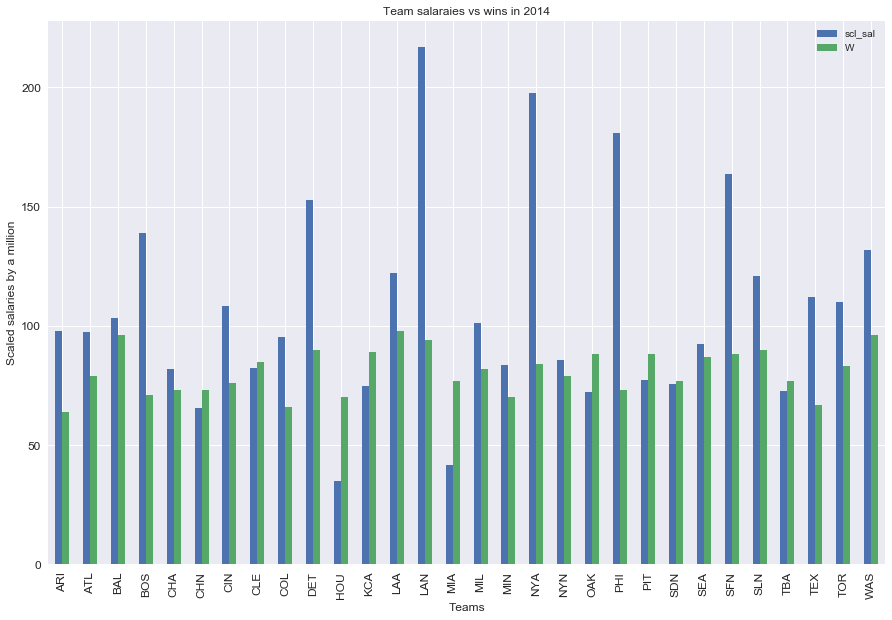

In [413]:
# Create a bar graph with scalled salaries and wins per team  to show the coordination between salaries vs wins 

salaries_vs_wins_df['scl_sal']= (salaries_vs_wins_df['salary']/1000000)
wins_sal_df  = salaries_vs_wins_df[['teamID','scl_sal','W']].set_index('teamID')
bx = wins_sal_df.plot( kind='bar',title ="Team salaraies vs wins in 2014", figsize=(15, 10),legend=True,  fontsize=12)
bx.set_xlabel("Teams", fontsize=12)
bx.set_ylabel("Scaled salaries by a million", fontsize=12)
plt.show()

#### The below graph shows the wins and salaries of each teams.The salaries are scalled and y axis represent 
#    the salaries in millions.
###

In [403]:
###Checking the corelation coefficient manually

def correlation(x,y):
    std_x = (x - x.mean())/x.std(ddof=0)
    std_y = (y-y.mean())/y.std(ddof=0)
    return (std_x*std_y).mean()

print correlation(salaries_vs_wins_df['salary'],salaries_vs_wins_df['W'])

0.322432582587


## For a scatter plot

Populating the interactive namespace from numpy and matplotlib
0.322432582587


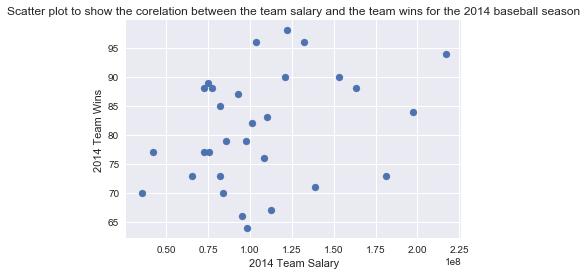

In [404]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

##To check the corelation coefficient

#np.correlation(salaries_vs_wins_df['salary'],salaries_vs_wins_df['W'])
print salaries_vs_wins_df['salary'].corr(salaries_vs_wins_df['W'])

plt.scatter(salaries_vs_wins_df['salary'],salaries_vs_wins_df['W'])
plt.xlabel('2014 Team Salary')
plt.ylabel('2014 Team Wins')
plt.title('Scatter plot to show the corelation between the team salary and the team wins for the 2014 baseball season')

## Corelation between team salaries and batting averages 

In [405]:
#####################################
# 3.Is there any corelation between team salaries and the team batting averages?                 #
#For this the team csv has to be loaded to get the 2014 Hits and AtBat stats for all teams 
# Then merge the salaraies and Batting stats dataframes with the required only columns
#Next we calculate the corelation coefficient for the salaries and Batting Average(Hits/AtBats) 
# Next do a scatter plot with the salaries and BA
#####################################

bat_stats2014_df=  teams_2014_df[['yearID','teamID','name','H','AB']].copy()
bat_stats2014_df['BA'] = (bat_stats2014_df['H']/bat_stats2014_df['AB'])
salaries_vs_BA_df= new_salaries_df.merge(bat_stats2014_df,left_on = ['yearID','teamID'],right_on = ['yearID','teamID'],how = 'left')


In [406]:
#Manually calculate the corelation coefficient
print correlation(salaries_vs_BA_df['salary'],salaries_vs_BA_df['BA'])

0.254234801897


0.254234801897


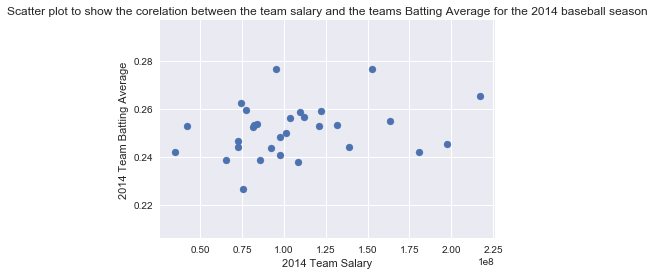

In [407]:
##To check the corelation coefficient
print salaries_vs_BA_df['salary'].corr(salaries_vs_BA_df['BA'])

plt.scatter(salaries_vs_BA_df['salary'],salaries_vs_BA_df['BA'])
plt.xlabel('2014 Team Salary')
plt.ylabel('2014 Team Batting Average')
plt.title('Scatter plot to show the corelation between the team salary and the teams Batting Average for the 2014 baseball season')


## Corelation between team salaries and Pitching stats (ERA )

In [408]:
#####################################
# 3.Is there any corelation between team salaries and the team Pitching stats and in this case we are taking the team ERA?                 #
# Then merge the salaraies and Pitching stats dataframes with the required only columns
# Next we calculate the corelation coefficient for the salaries and ERA(earned Runs Average)
# Next do a scatter plot with the salaries and ERA
#####################################

pitch_stats2014_df=  teams_2014_df[['yearID','teamID','name','ER','ERA']].copy()
salaries_vs_ERA_df= new_salaries_df.merge(pitch_stats2014_df,left_on = ['yearID','teamID'],right_on = ['yearID','teamID'],how = 'left')
print salaries_vs_ERA_df

    yearID teamID     salary                           name   ER   ERA
0     2014    ARI   97861500           Arizona Diamondbacks  683  4.26
1     2014    ATL   97609000                 Atlanta Braves  547  3.38
2     2014    BAL  103416000              Baltimore Orioles  557  3.43
3     2014    BOS  139019929                 Boston Red Sox  653  4.01
4     2014    CHA   81830500                   Chicago Cubs  687  4.29
5     2014    CHN   65522500              Chicago White Sox  636  3.91
6     2014    CIN  108217500                Cincinnati Reds  576  3.59
7     2014    CLE   82151899              Cleveland Indians  581  3.56
8     2014    COL   95403500               Colorado Rockies  770  4.84
9     2014    DET  152855500                 Detroit Tigers  648  4.01
10    2014    HOU   35116300                 Houston Astros  657  4.11
11    2014    KCA   74594075             Kansas City Royals  565  3.51
12    2014    LAA  121988250  Los Angeles Angels of Anaheim  590  3.58
13    

In [409]:
#Manually calculate the corelation coefficient
print correlation(salaries_vs_ERA_df['salary'],salaries_vs_ERA_df['ERA'])

-0.100231270169


-0.100231270169


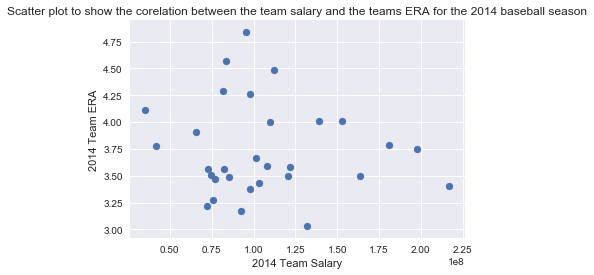

In [410]:
##To check the corelation coefficient
print salaries_vs_ERA_df['salary'].corr(salaries_vs_ERA_df['ERA'])

plt.scatter(salaries_vs_ERA_df['salary'],salaries_vs_ERA_df['ERA'])
plt.xlabel('2014 Team Salary')
plt.ylabel('2014 Team ERA')
plt.title('Scatter plot to show the corelation between the team salary and the teams ERA for the 2014 baseball season')


## Analysis of the team salaries to different baseball stats.

   The goal of this project is to see if there is any corelation between the amount of money baseball teams spend on salaries and the baseball statistics acheived. I have used the scatter plots and manually calculation the Pearson's r to find the corelation. Below are the results
   

WINS

Team Wins was the highest correlated basemball statistic with Team salary.
The correlation value was .3224. This means that there was moderate positive correlation salaries and wins
during the 2014 season. The scatter plot provided visual evidence of this finding, as the
points were moderately clustered in a positive linear pattern. This result suggests that it
might be important for teams to study the relationship between team wins  and
salary. 

BATTING STATS

The correlation value for batting average with team
salary was 0.2542. This indicates that there was slight 
positive correlation during the 2014 season. The result from this computation shows that even though the higher the salary is the batting averages do increase but only slightly.
Hence the teams might think if it the money spent on salaries is worth the retun.


PITCHING STATS

The correlation value for pitching statistic(ERA) with team
salary was -0.1002. This indicates that there was very little 
negative correlation during the 2014 season. The result from this computation is surprising
because as the team salary increased, the ERA should have reduced more significantly . 
Maybe this will give some thought for the teams when they are aquiring pitchers.


    In conclusion I can see that we can see the best corelation between salaries and wins. But I also have to add that the above results are based only on one year of baseball stats and there is more than 100 years of data present. Hence though the results indicate in a certain direction further analysis is required with more comprehensive data t make conclusive predictions.